In [55]:
import pandas as pd
import matplotlib as mpl
from io import StringIO

# Le mode
## Mode simple

In [85]:
s = pd.Series([90,95,90,95,85,75,90,100,80,75])
s.mode()

0    90
dtype: int64

In [87]:
s.value_counts()

90     3
95     2
75     2
85     1
100    1
80     1
dtype: int64

## Mode multiple

In [88]:
s = pd.Series([100,95,90,95,85,75,90,100,80,75])
s.mode()

0     75
1     90
2     95
3    100
dtype: int64

In [95]:
s.value_counts()

95     2
75     2
90     2
100    2
85     1
80     1
dtype: int64

## Variable quantitative continue

In [46]:
df = pd.read_csv(StringIO("""age,x,n,a
0-19 ans,0,14115,20
20-29 ans,20,7403,10
30-39 ans,30,7842,10
40-49 ans,40,7967,10
50-59 ans,50,8281,10
60-69 ans,60,7716,10
70-79 ans,70,5521,10
80-89 ans,80,3074,10
90-99 ans,90,878,10
"""))

In [57]:
df["d"] = df.n / df.a # calcule de la densité

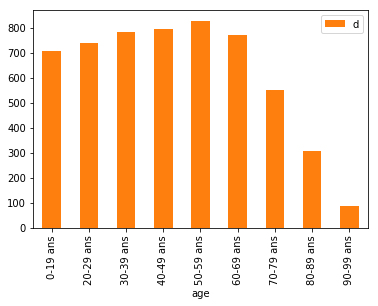

In [58]:
df.plot(kind = "bar", x = "age", y = "d",  color=['tab:orange',]*12)

In [53]:
h = df.d.max() # Hauteur de la classe modal
x1 = df.x[df.d.idxmax()] # début de la classe modal
x2 = df.x[df.d.idxmax() + 1] # fin de la classe modal
h1 = df.d[df.d.idxmax() - 1] # hauteur de la classe précédent la classe modal
h2 = df.d[df.d.idxmax() + 1] # hauteur de la classe suivant la classe modal
h, x1, x2, h1, h2

(828.1, 50, 60, 796.7, 771.6)

In [66]:
k1 = (h - h1) # Différence entre les hauteures à gauche
k2 = (h - h2) # Différence entre les hauteures à droite
Mo = ((k2 * x1) + (k1 * x2))/(k1 + k2) # Mode comme moyenne pondérée de x1 et x2
k1, k2, Mo

(31.399999999999977, 56.5, 53.57224118316268)

In [72]:
# formule alternative qui montre le déplacement vers x1 si k1 < k2
Mo2 = x1 + k1 / (k1 + k2) * (x2 - x1)
Mo, Mo2

(53.57224118316268, 53.57224118316268)

# La mediane

In [148]:
df = pd.read_csv(StringIO("""a	b	n
15	20	7573 
20	25	563044 
25	30	1594191 
30	40	2488412 
40	60	3063199 
60	80	974740
"""), sep="	")

In [149]:
df["ncc"] = df.n.cumsum()

In [150]:
df["ncd"] = df.n.loc[::-1].cumsum()

In [156]:
df

,a,b,n,ncc,ncd
0,15,20,7573,7573,8691159
1,20,25,563044,570617,8683586
2,25,30,1594191,2164808,8120542
3,30,40,2488412,4653220,6526351
4,40,60,3063199,7716419,4037939
5,60,80,974740,8691159,974740


In [157]:
# nombre d'occurance
total = df.n.sum()
total

8691159

In [168]:
y = total / 2
y

4345579.5

In [169]:
med_classe = df[df['ncc'] - y > 0][:1]
med_classe

,a,b,n,ncc,ncd
3,30,40,2488412,4653220,6526351


In [170]:
from scipy import interpolate
f = interpolate.interp1d(df.ncc, df.b)
me = f(y)
me

array(38.76370754)

In [167]:
# check manually
x1 = med_classe.a
x2 = med_classe.b
y1 = med_classe.ncc - med_classe.n
me2 = x1 + ((y - y1) * (x2 - x1) / med_classe.n)
me2

3    38.76371
dtype: float64

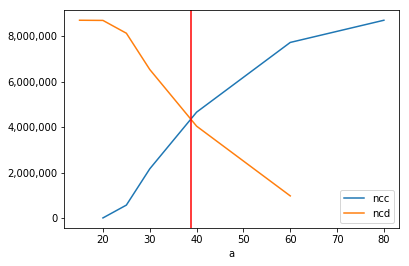

In [98]:
ax = df[["ncc","b"]].plot(x = "b")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
df[["ncd", "a"]].plot(x = "a", ax = ax)
ax.axvline(x = me, color = "red")

# Les moyennes

In [116]:
df = pd.DataFrame([11, 13, 15, 17, 19])

In [129]:
somme = df.sum()[0]
n = df.count()[0]
m = df.mean()[0]
m2 = somme / n
somme, n, m, m2

(75, 5, 15.0, 15.0)

In [143]:
df = pd.read_csv(StringIO("""matiere,note,coefficient
Statistique,4.5,2
Anglais,5.0,1
Economie,4.0,2
Génie logiciel,5.0,3
Danse,4.5,1
Rhétorique,4.0,1
Musique,5,1
Mathématique,4.5,3
"""))

In [144]:
df["nc"] = df.note * df.coefficient
df

,matiere,note,coefficient,nc
0,Statistique,4.5,2,9.0
1,Anglais,5.0,1,5.0
2,Economie,4.0,2,8.0
3,Génie logiciel,5.0,3,15.0
4,Danse,4.5,1,4.5
5,Rhétorique,4.0,1,4.0
6,Musique,5.0,1,5.0
7,Mathématique,4.5,3,13.5


In [142]:
df.nc.sum() / df.coefficient.sum()

4.571428571428571